# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2023/)    
## 1MS041, 2023 
&copy;2023 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

## Second notebook on Random variables

Lets take a look again at the spam dataset and look at our concepts there

In [1]:
from Utils import load_sms
sms_data = load_sms()
sms_data[:2]

[('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
  0),
 ('Ok lar... Joking wif u oni...', 0)]

Let X represents each SMS text (an entry in the list), and let $Y$ represent whether text is spam or not i.e. $Y \in \{0,1\}$. Thus $\mathbb{P}(Y = 1)$ is the probability that we get a spam. The goal is to estimate:
$$
    \mathbb{P}(Y = 1 | \text{"free" or "prize" is in } X) \enspace .
$$
That is, the probability that the SMS is spam given that "free" or "prize" occurs in the SMS. 
Hint: it is good to remove the upper/lower case of words so that we can also find "Free" and "Prize"; this can be done with `text.lower()` if `text` a string.

To do this we can create a new random variable $Z$ which is $1$ if "free" or "prize" appears in $X$.

In [2]:
interesting_words=set(['free','prize'])
TF10 = {True: 1, False: 0}
Z_obs = [TF10[not interesting_words.isdisjoint([word.lower() for word in line[0].split(' ')])] for line in sms_data]

In [3]:
Z_obs[:10]

[0, 0, 1, 0, 0, 0, 0, 0, 1, 1]

In [4]:
Y_obs = [y for x,y in sms_data]
Y_obs[:10]

[0, 0, 1, 0, 0, 1, 0, 0, 1, 1]

In [5]:
import numpy as np
def F_X_12(x):
    TF10 = {True: 1, False: 0}
    return np.mean([TF10[(x1 <= x[0]) and (x2 <= x[1])] for x1,x2 in zip (Y_obs,Z_obs)])

This is the JDF for this problem

In [8]:
print("\t\tz2 <= 0 \tz2 <= 1")
for x1 in range(0,2):
    print("y1 <= %d \t" % x1,end='')
    for x2 in range(0,2):
        print("%.2f" % (F_X_12((x1,x2))),end='\t\t')
    print('\n')

		z2 <= 0 	z2 <= 1
y1 <= 0 	0.86		0.87		

y1 <= 1 	0.96		1.00		



In [9]:
F_X_12((1,0))

0.9551328068916008

In [10]:
F_X_12((0,0)) == F_X_12((0,1))*F_X_12((1,0))

False

In [11]:
F_X_12((0,1))*F_X_12((1,0))

0.8270846721557743

In [ ]:
# Are they indepdentent? If so, then the JDF is just the product of the 
# DFs for Y and Z, but
0.865936826992103*0.955132806891601

Which is not 0.858, so they are not independent. So lets try to estimate the probability that $Y=1$ given that $Z = 1$. Lets again do that by filtering

In [12]:
np.mean([y for z,y in zip(Z_obs,Y_obs) if z == 1])

0.812

Compare that with the marginal probability of $Y = 1$, which is according to our JDF 1-0.866 = 0.134

In [13]:
# Or we can just compute it directly
np.mean(Y_obs)

0.13406317300789664

What we see from this is that knowing that the words "free" or "prize" appeared in the sms text, we are much more certain that it is a spam. We also see that looking directly at the JDF this can be hard to see, although it is equivalent.

## Moments etc

In [14]:
import numpy as np
x = np.random.normal(size=100)

In [15]:
x

array([-0.23013023, -1.15960059, -1.29800416,  0.49372223,  1.43513136,
        0.3339858 ,  0.01422828, -0.51724594,  0.05452224, -0.26471815,
       -0.77422988,  1.46343744, -1.40611726,  0.67787894,  0.8622198 ,
        1.01677539,  0.62850506,  0.22358216, -1.53829652,  0.27066969,
        0.09531665,  1.47847637,  1.05220457,  0.00633798,  1.65798392,
       -0.98445439,  1.56384226, -0.83089188, -0.8802556 ,  1.24741463,
       -1.59008675,  0.06949289, -1.92203219, -1.65458571, -1.12116214,
        0.36902884, -0.65791506,  0.29318862, -0.73062357,  0.15728344,
       -1.44655971,  0.92090782,  0.66962457, -1.23854506, -0.00604782,
        0.52029807, -0.26218628, -1.51989637, -0.41273922,  1.14693072,
       -0.23024833, -1.63102297, -1.31133067,  0.20569302,  0.04005022,
        0.53701999, -1.21797016,  0.07876426, -0.46296632, -0.57514866,
       -0.24349943,  0.69784646, -0.76459193, -1.49080199,  0.50385392,
       -0.28918363,  0.9582917 ,  0.6272283 ,  1.68319326,  0.52

## Sample mean

In [16]:
np.mean(x)

-0.09600384399948546

## Sample variance

In [17]:
np.var(x)

0.8745927948837289

Or by doing it yourself

In [18]:
mu = np.mean(x)
np.mean(np.power(x-mu,2))

0.8745927948837289

Higher moments, we can use `scipy`

In [19]:
from scipy.stats import skew, kurtosis

In [20]:
skew(x)

-0.057843616138370184

In [21]:
kurtosis(x,fisher=False)

2.1898514724075087

## Moments and tail behavior

In [22]:
def standardize(data):
    mean = np.mean(data)
    std = np.sqrt(np.var(data))
    return (data-mean)/std

(-3.0, 5.0)

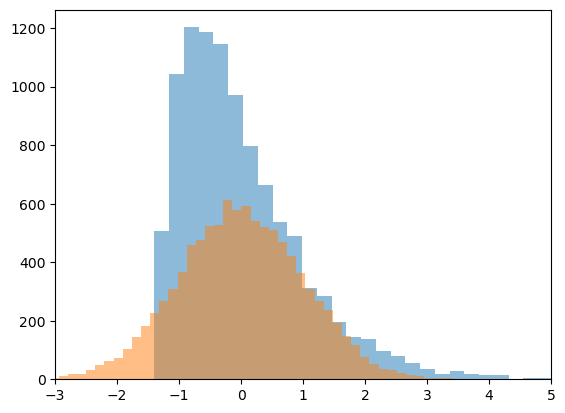

In [23]:
import numpy as np
chi2 = np.random.chisquare(4,size=10000)
normal = np.random.normal(size=10000)
import matplotlib.pyplot as plt
_=plt.hist(standardize(chi2),bins=50,alpha=0.5)
_=plt.hist(standardize(normal),bins=50,alpha=0.5)
plt.xlim(-3,5)

In [24]:
from scipy.stats import skew, kurtosis
def print_basic_stats(data):
    print("mean: %.2f\tstd: %.2f\tskew: %.2f\tkurtosis: %.2f" % (np.mean(data),np.std(data),skew(data),kurtosis(data,fisher=False)))

In [25]:
print_basic_stats(normal)

mean: -0.00	std: 1.00	skew: 0.01	kurtosis: 2.95


In [26]:
print_basic_stats(chi2)

mean: 3.99	std: 2.82	skew: 1.44	kurtosis: 6.66


In [31]:
print_basic_stats(standardize(np.sqrt(chi2)))

mean: 0.00	std: 1.00	skew: 0.40	kurtosis: 3.07


In [28]:
np.mean(np.power(standardize(chi2),3)) # Skewness

1.4431375660733488

In [29]:
np.mean(np.power(standardize(chi2),4)) # kurtosis

6.662314494041931

## Transformations of random variables

Consider a Binomial random variable

In [ ]:
n = 10
p = 0.5
x = np.random.binomial(n,p,size=1000)

Lets plot the empirical density

In [ ]:
from Utils import makeEMF,makeEDF,plotEDF,plotEMF
plotEMF(makeEMF(x))

If we had the function $g(x) = \sin(x/3)$

In [ ]:
plotEMF(makeEMF(np.sin(x)))

In [ ]:
plotEDF(makeEDF(np.sin(x)))

Can we compute this thing?
What is $\sin^{[-1]}$?

Since $X$ is discrete, we can check what $\mathbb{Y}$ is, since $\mathbb{X}=\{0,1,\ldots,10\}$.

In [ ]:
Y_space = np.sort(np.sin(np.arange(0,11)))
sin_inv = dict(zip(np.sin(np.arange(0,11)),np.arange(0,11)))

In [ ]:
from scipy.special import binom as binomial
plotEMF([(y,binomial(n,sin_inv[y])*(p**sin_inv[y])*((1-p)**(n-sin_inv[y]))) for y in Y_space])

In [ ]:
plotEDF(emfToEdf([(y,binomial(n,sin_inv[y])*(p**sin_inv[y])*((1-p)**(n-sin_inv[y]))) for y in Y_space]))